# Automatic Analysis of XAS *In-Situ* Data w. Measured Standards
Notebook showing an example workflow used for automatic analysis of XAS *in-situ* data when standards for both unreduced precursors and reduced metal foils have been measured on the same instrument.

This notebook should only be considered as a help and guide for performing automatic analysis of XAS data. 
It is therefore encouraged to make modifications to the notebook to fit your specific needs.

# Imports
Here the required packages and functions are imported.

Whether plots are interactive is also changed here. 

In [1]:
# Functions written for the analysis of XAS data
from XAS_functions import *

%matplotlib inline

# Global variables

In [2]:
synchrotron = 'ESRF'

# Boolean flags
Here the values of boolean flags (True/False) that occur throughout the notebook can be changed.

In [3]:
# Decide if transmission or absorption data should be used for normalization and analysis
use_transmission = False
# Decide if subtraction of pred-edge should be used for normalization
use_preedge = True
# Decide if plots should be interactive or static
interactive = False

# Standards and preprocessing
Here the measured standards (metal foils and precursors) are loaded and preprocessed. 

This section only needs to be run once, as it applies to all experiments measured on the same instrument.

## Metal foils

In [4]:
# Specify data location
folder_metal_foils = './Data/ESRF_BM31/Standards/Standards/'

# Load data
df_foils = load_xas_data(
    folder_metal_foils,
    synchrotron='ESRF', 
    file_selection_condition='mono', 
    negated_condition=True,
)

# Initial data processing
df_foils = processing_df(df_foils, synchrotron='ESRF')

Loading data: 100%|██████████| 6/6 [00:00<00:00, 20.94it/s, Currently loading Rufoil.dat]


### Edge energy corrections
The energy shifts of the different edges are systematic errors from the instrument. Therefore the shift is consistent across measurements and we can correct the measured data using the theoretical edge energies.

In [5]:
# Calculate the edge energy shift at each edge
edge_correction_energies = {
    'Pd':calc_edge_correction(df_foils, metal='Pd', edge='K', transmission=use_transmission),
    'Ag':calc_edge_correction(df_foils, metal='Ag', edge='K', transmission=use_transmission),
    'Rh':calc_edge_correction(df_foils, metal='Rh', edge='K', transmission=use_transmission),
    'Ru':calc_edge_correction(df_foils, metal='Ru', edge='K', transmission=use_transmission),
    'Mn':calc_edge_correction(df_foils, metal='Mn', edge='K', transmission=use_transmission),
    'Mo':calc_edge_correction(df_foils, metal='Mo', edge='K', transmission=use_transmission),
    'Ir':calc_edge_correction(df_foils, metal='Ir', edge='L3', transmission=use_transmission),
    'Pt':calc_edge_correction(df_foils, metal='Pt', edge='L3', transmission=use_transmission),
    }

### Normalization
Normalization includes correcting the energy shifts, subtraction by the minimum measured value and division by a fit to the post-edge data. A fit to the pre-edge data can also be used to subtract from the data, but can sometimes lead to overcorrections. 

The pre- and post-edge fits can be visually inspected using the "plot_non_normalized_xas()" function with the optional arguments "pre_edge=True" and "post_edge=True". 

All normalization of data **must** use the same normalization procedure!

In [6]:
# Normalization of the data
normalize_data(
    df_foils, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission,
)
df_foils.head()

,Filename,Experiment,Measurement,ZapEnergy,MonEx,xmap_roi00,Ion1,Metal,Precursor,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,Agfoil.dat,Agfoil,1,25.400257,1838.0,1642.0,47334.0,Ag,foil,25400.257812,25.791746,0.893362,-3.248551,25392.158203,0.003653,-0.151765,57.481832
1,Agfoil.dat,Agfoil,1,25.400560,1856.0,1549.0,47827.0,Ag,foil,25400.560547,25.791746,0.834590,-3.249167,25392.460938,0.002536,-0.146117,57.481148
2,Agfoil.dat,Agfoil,1,25.401297,1854.0,1587.0,47723.0,Ag,foil,25401.296875,25.791746,0.855987,-3.248068,25393.197266,0.002669,-0.132379,57.479485
3,Agfoil.dat,Agfoil,1,25.402010,1855.0,1650.0,47774.0,Ag,foil,25402.009766,25.791746,0.889488,-3.248597,25393.910156,0.003021,-0.119078,57.477874
4,Agfoil.dat,Agfoil,1,25.402702,1855.0,1670.0,47787.0,Ag,foil,25402.703125,25.791746,0.900270,-3.248869,25394.603516,0.002984,-0.106142,57.476307


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

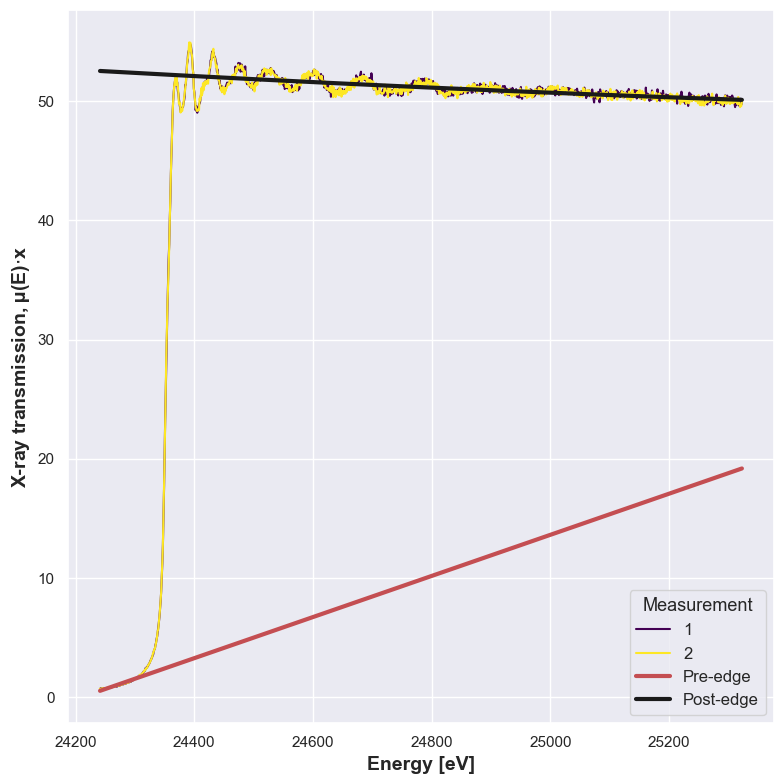

In [7]:
plot_non_normalized_xas(df_foils, 'Pdfoil', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

## Precursors

In [8]:
# Specify data loccation
folder_precursor_standards = './Data/ESRF_BM31/wheel/wheel/'

# Load data
df_precursors = load_xas_data(
    folder_precursor_standards, 
    synchrotron='ESRF', 
    file_selection_condition='mono', 
    negated_condition=True,
)

# Initial data processing
df_precursors = processing_df(df_precursors, synchrotron='ESRF')

Loading data: 100%|██████████| 8/8 [00:00<00:00, 21.47it/s, Currently loading Ruacac.dat]

Incomplete measurement detected!
Not all edges were measured 3 times, but only 2 times.
Incomplete measurements will be removed unless keep_incomplete="True".

Incomplete measurements were removed!


### Normalization

In [9]:
# Normalization of the data
normalize_data(
    df_precursors, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_precursors.head()

,Filename,Experiment,Measurement,ZapEnergy,MonEx,xmap_roi00,Ion1,Metal,Precursor,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,Agacac.dat,Agacac,1,25.400257,15827.0,2483.0,38828.0,Ag,acac,25400.257812,1100.0,0.156884,-0.897424,25392.158203,0.003475,-0.028298,8.114891
1,Agacac.dat,Agacac,1,25.400560,15951.0,2585.0,39134.0,Ag,acac,25400.560547,1100.0,0.162059,-0.897470,25392.460938,0.004003,-0.027416,8.114993
2,Agacac.dat,Agacac,1,25.401253,15932.0,2544.0,39093.0,Ag,acac,25401.251953,1100.0,0.159679,-0.897614,25393.152344,0.003464,-0.025402,8.115225
3,Agacac.dat,Agacac,1,25.402031,15940.0,2685.0,39104.0,Ag,acac,25402.031250,1100.0,0.168444,-0.897393,25393.931641,0.004263,-0.023132,8.115487
4,Agacac.dat,Agacac,1,25.402941,15921.0,2678.0,39048.0,Ag,acac,25402.941406,1100.0,0.168206,-0.897153,25394.841797,0.003909,-0.020481,8.115793


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

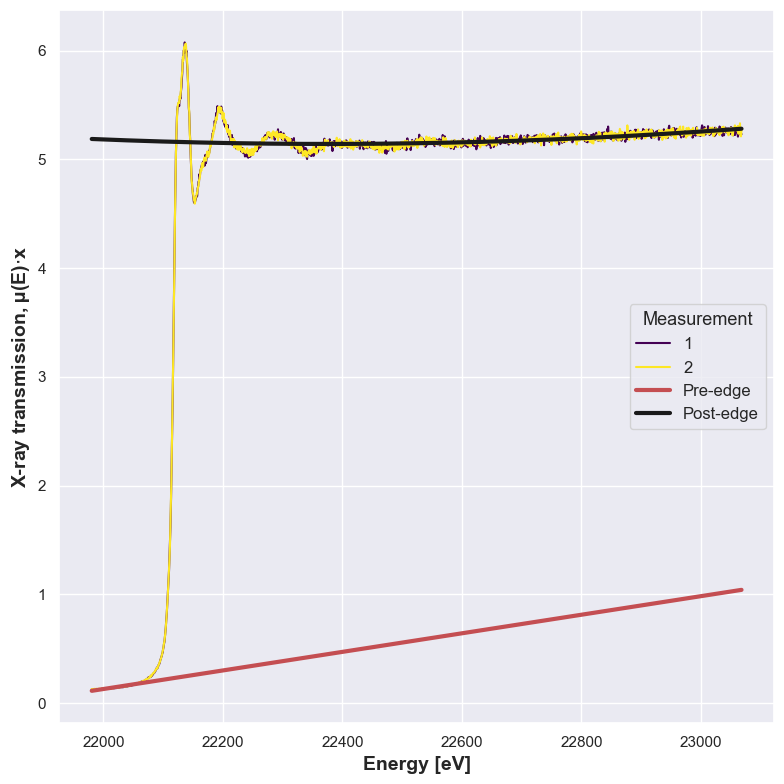

In [10]:
plot_non_normalized_xas(df_precursors, 'Ruacac', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

# Experiments
Here the measured data from different experiments are loaded, preprocessed and analysed. 

This section needs to be run every time a new experiment is analysed.

## Preprocessing

### Single dataset
Use either this section or *Stiching together datasets*.

In [11]:
# # Specify data location
# folder_XAS_data = './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS1/'

# # Load data
# df_data = load_xas_data(
#     folder_XAS_data, 
#     synchrotron='ESRF', 
#     file_selection_condition='mono', 
#     negated_condition=True
# )

# # Initial data processing
# df_data = processing_df(df_data, synchrotron='ESRF')

### Stiching together datasets
Use either this section or *Single dataset*.

In [12]:
# Specify all data locations
list_of_folders = [
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS1/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS2/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS3/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS4/',
]

# Create empty list to hold all datasets
list_of_datasets = []

# Load data
for folder in list_of_folders:
    df_data = load_xas_data(
        folder, 
        synchrotron='ESRF', 
        file_selection_condition='mono', 
        negated_condition=True, 
        verbose=False,
    )

    # Initial data processing
    df_data = processing_df(df_data, synchrotron='ESRF')

    # Append to list of datasets
    list_of_datasets.append(df_data)

# Combine the datasets
df_data = combine_datasets(list_of_datasets)

Loading data: 100%|██████████| 5/5 [00:00<00:00, 17.34it/s, Currently loading Ru.dat]


### Normalization

In [13]:
# Normalization of the data
normalize_data(
    df_data, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_data.head()

,index,Filename,Experiment,Measurement,ZapEnergy,MonEx,xmap_roi00,Ion1,Metal,Precursor,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,0,Ir.dat,Ir,1,11.170101,83329.0,389.0,44793.0,Ir,None,11170.101562,39.459183,0.004668,0.620745,11166.945312,0.008543,-0.001677,0.224033
1,1,Ir.dat,Ir,1,11.170307,83551.0,377.0,44911.0,Ir,None,11170.307617,39.459183,0.004512,0.620774,11167.151367,0.007512,-0.001599,0.223956
2,2,Ir.dat,Ir,1,11.170659,83612.0,384.0,44955.0,Ir,None,11170.659180,39.459183,0.004593,0.620525,11167.502930,0.007287,-0.001466,0.223823
3,3,Ir.dat,Ir,1,11.171026,83536.0,369.0,44922.0,Ir,None,11171.026367,39.459183,0.004417,0.620350,11167.870117,0.005900,-0.001327,0.223684
4,4,Ir.dat,Ir,1,11.171415,83525.0,409.0,44919.0,Ir,None,11171.415039,39.459183,0.004897,0.620285,11168.258789,0.007387,-0.001180,0.223537


#### Saving results as .csv file

In [14]:
# save_data(df_data, filename='Normalized_XAS_data.csv')

## Data inspection
It is always a good idea to visually inspect the data to see if it behaves as it should.

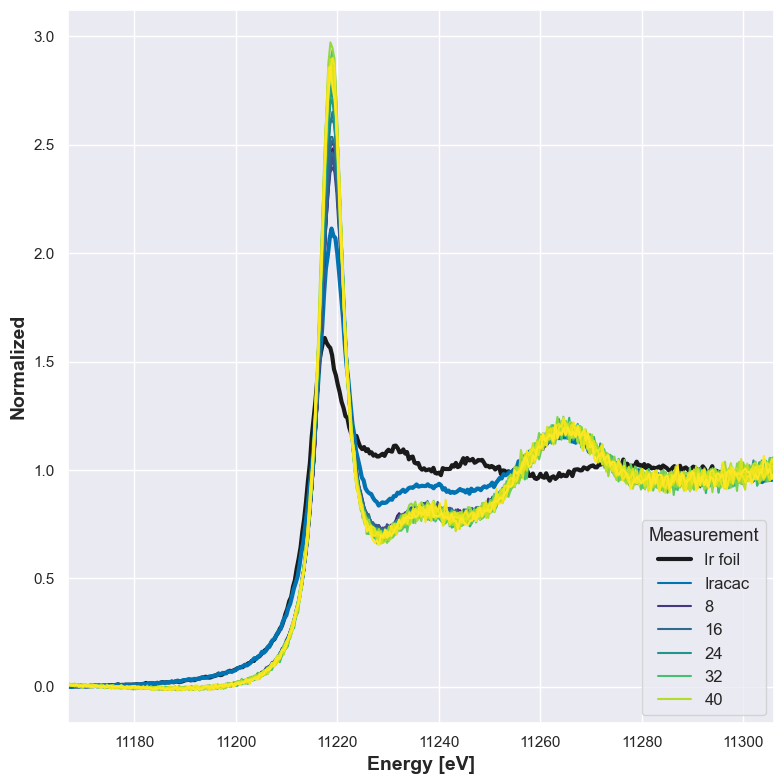

In [15]:
plot_data(df_data, 'Ir', foils=df_foils, precursors=df_precursors, precursor_suffix=None, interactive=interactive)

## Linear combination analysis
This section performs linear combination analysis (LCA) of every combination of two-component systems consisting of 1 metal foil and 1 precursor (with the same metal). 

The estimated uncertainties of the dependent parameter behaves weird when the independent parameter is approximately zero. In the column "StdCorrected" this is handled by using the same uncertainty for both parameters.

In [16]:
df_results = linear_combination_analysis(df_data, df_foils, df_precursors)
df_results.head()

LCA progress: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it, Analysing Ruacac + Rufoil]


,Experiment,Metal,Precursor,Precursor Type,Measurement,Temperature,Temperature Average,Temperature Std,Parameter,Value,StdErr,StdCorrected,Basis Function
0,Iracac + Irfoil,Ir,Iracac,acac,1,41.438393,41.440155,1.347250,product_weight,1.110223e-16,0.014656,0.014656,"[0.00291757579212226, 0.00275071555087417, 0.0..."
1,Iracac + Irfoil,Ir,Iracac,acac,1,41.438393,41.440155,1.347250,precursor_weight,1.000000e+00,0.000000,0.014656,"[0.0008645462164939049, 0.00099454042896995, -..."
2,Iracac + Irfoil,Ir,Iracac,acac,2,46.650097,43.886864,1.941293,product_weight,0.000000e+00,0.002124,0.002124,"[0.002925370389674633, 0.0027683323392483582, ..."
3,Iracac + Irfoil,Ir,Iracac,acac,2,46.650097,43.886864,1.941293,precursor_weight,1.000000e+00,0.002124,0.002124,"[0.0008455066173686916, 0.0010655197628156, -0..."
4,Iracac + Irfoil,Ir,Iracac,acac,3,47.809467,47.003166,2.547060,product_weight,0.000000e+00,0.008587,0.008587,"[0.0028958443312901015, 0.0027540711296121104,..."


#### Saving results as .csv file

In [17]:
# save_data(df_results, filename='LCA_results.csv')

### Results plotting

#### Temperature curves

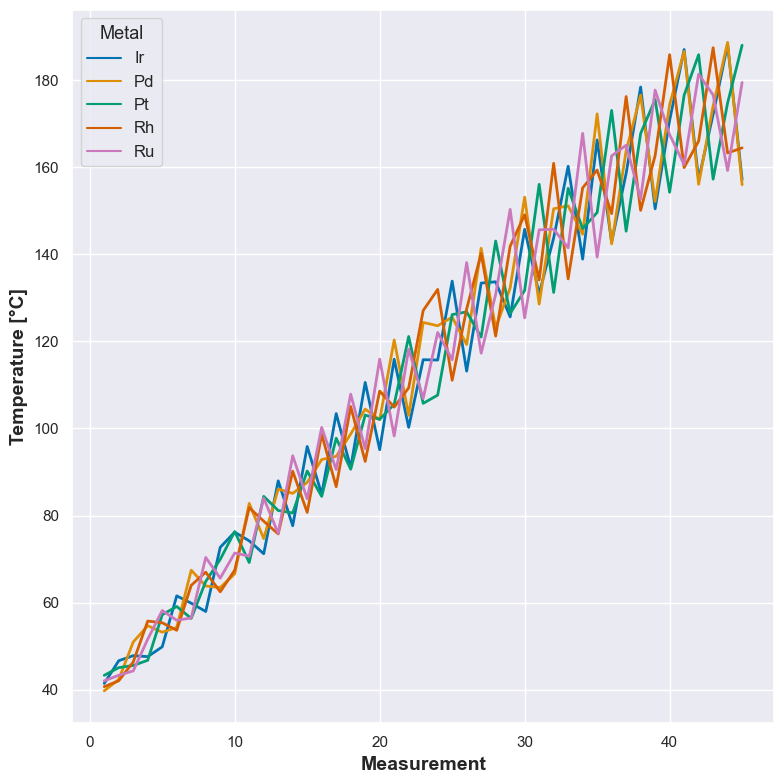

In [20]:
plot_temperatures(df_results, with_uncertainty=True, interactive=interactive)

#### Plot of a single LCA fit
Plot showing the measurement that is being fitted, the contributions from the components and the residual.

In [19]:
plot_LCA(df_results, df_data, experiment='Iracac + Irfoil', measurement=1, interactive=interactive)

IndexError: index 0 is out of bounds for axis 0 with size 0

#### Plot of LCA component weights over time
Plot showing how the weight of each component changes over time.

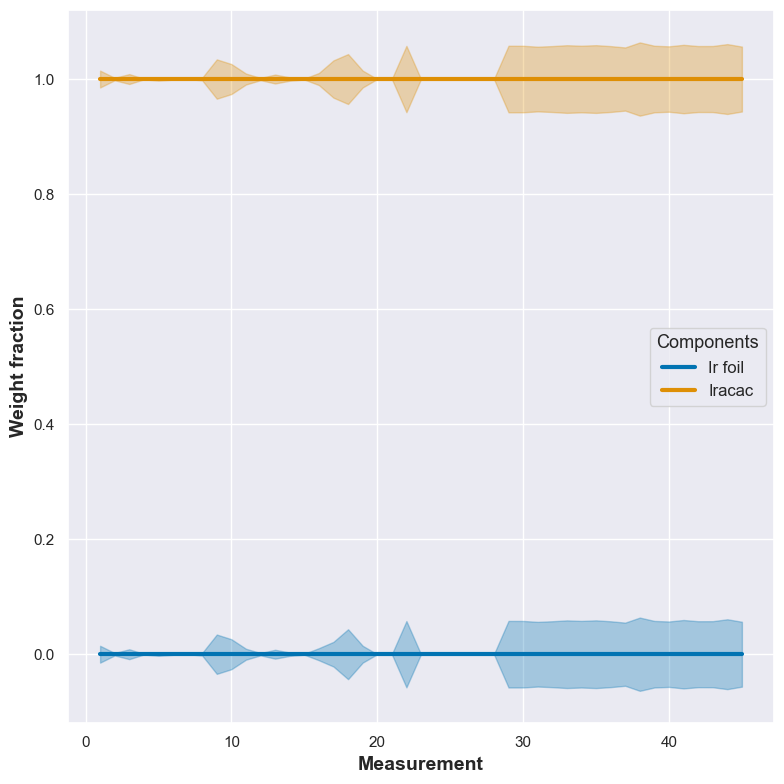

In [ ]:
plot_LCA_change(df_results, metal='Ir', precursor_suffix='acac', x_axis='Measurement', with_uncertainty=True, interactive=interactive)

#### Comparison of reduction times of different metals
Plot showing the weight of the metal foil component over time for the different metal species in the sample. 

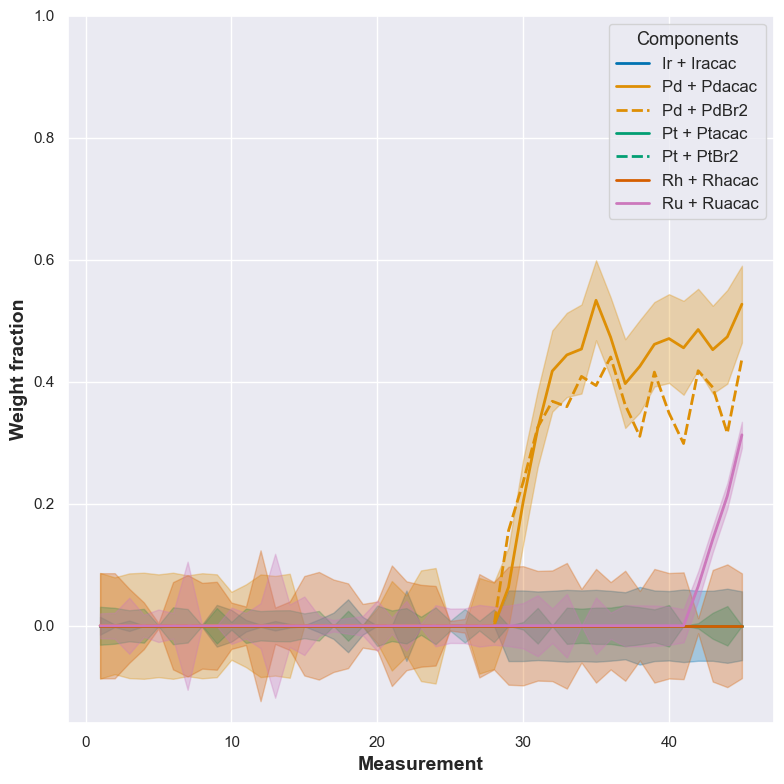

In [ ]:
plot_reduction_comparison(df_results, precursor_type='all', x_axis='Measurement', with_uncertainty=True, interactive=interactive)